## Generate subpanels 1d-1f

In [1]:
## import statement

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scanpy
import pandas
from typing import Tuple, Any, List, Union
import numpy as np
import torch
import os
from anndata import read_h5ad
from scanpy import pp
import pandas as pd
import umap
import scanpy as sc
import random
import pickle

# tissuemosaic import
import tissuemosaic as tp

In [2]:
from tissuemosaic.genex.gene_utils import *
from tissuemosaic.genex.poisson_glm import *
from tissuemosaic.utils import *
from tissuemosaic.plots import *
from tissuemosaic.plots.plot_misc import *

In [3]:
## set seeds
r_seed=t_seed=n_seed=100

random.seed(r_seed)
torch.manual_seed(t_seed)
np.random.seed(n_seed)

In [4]:
# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']

import seaborn as sns
colors = sns.color_palette("deep", 10).as_hex()

# assign color to cell type
cdict = {
    'ES': colors[0],
    'RS': colors[1],
    'Myoid': colors[2],
    'SPC': colors[3],
    'SPG': colors[4],
    'Sertoli': colors[5],
    'Leydig': colors[6],
    'Endothelial': colors[7],
    'Macrophage': colors[8]
}

In [5]:
## plotting parameters

linewidth = 5
tickfontsize = 80
labelfontsize = 80
labelpad = 40
titlefontsize=80
legendfontsize=80

In [6]:
## pytorch

torch.cuda.set_device(0)
torch.set_default_tensor_type(torch.FloatTensor)

/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at /opt/conda/conda-bld/pytorch_1708025845868/work/torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


In [7]:
## Make plots directory if it doesn't already exist
try:
    os.mkdir("./plots")
except:
    pass

### generate 1D

In [8]:
models = ["dino"]
prefixes = ["dino_filter_2.0_ctype"]
results_dirs = [os.path.abspath("../TissueMosaic_output/testis/gr_output/dino")]

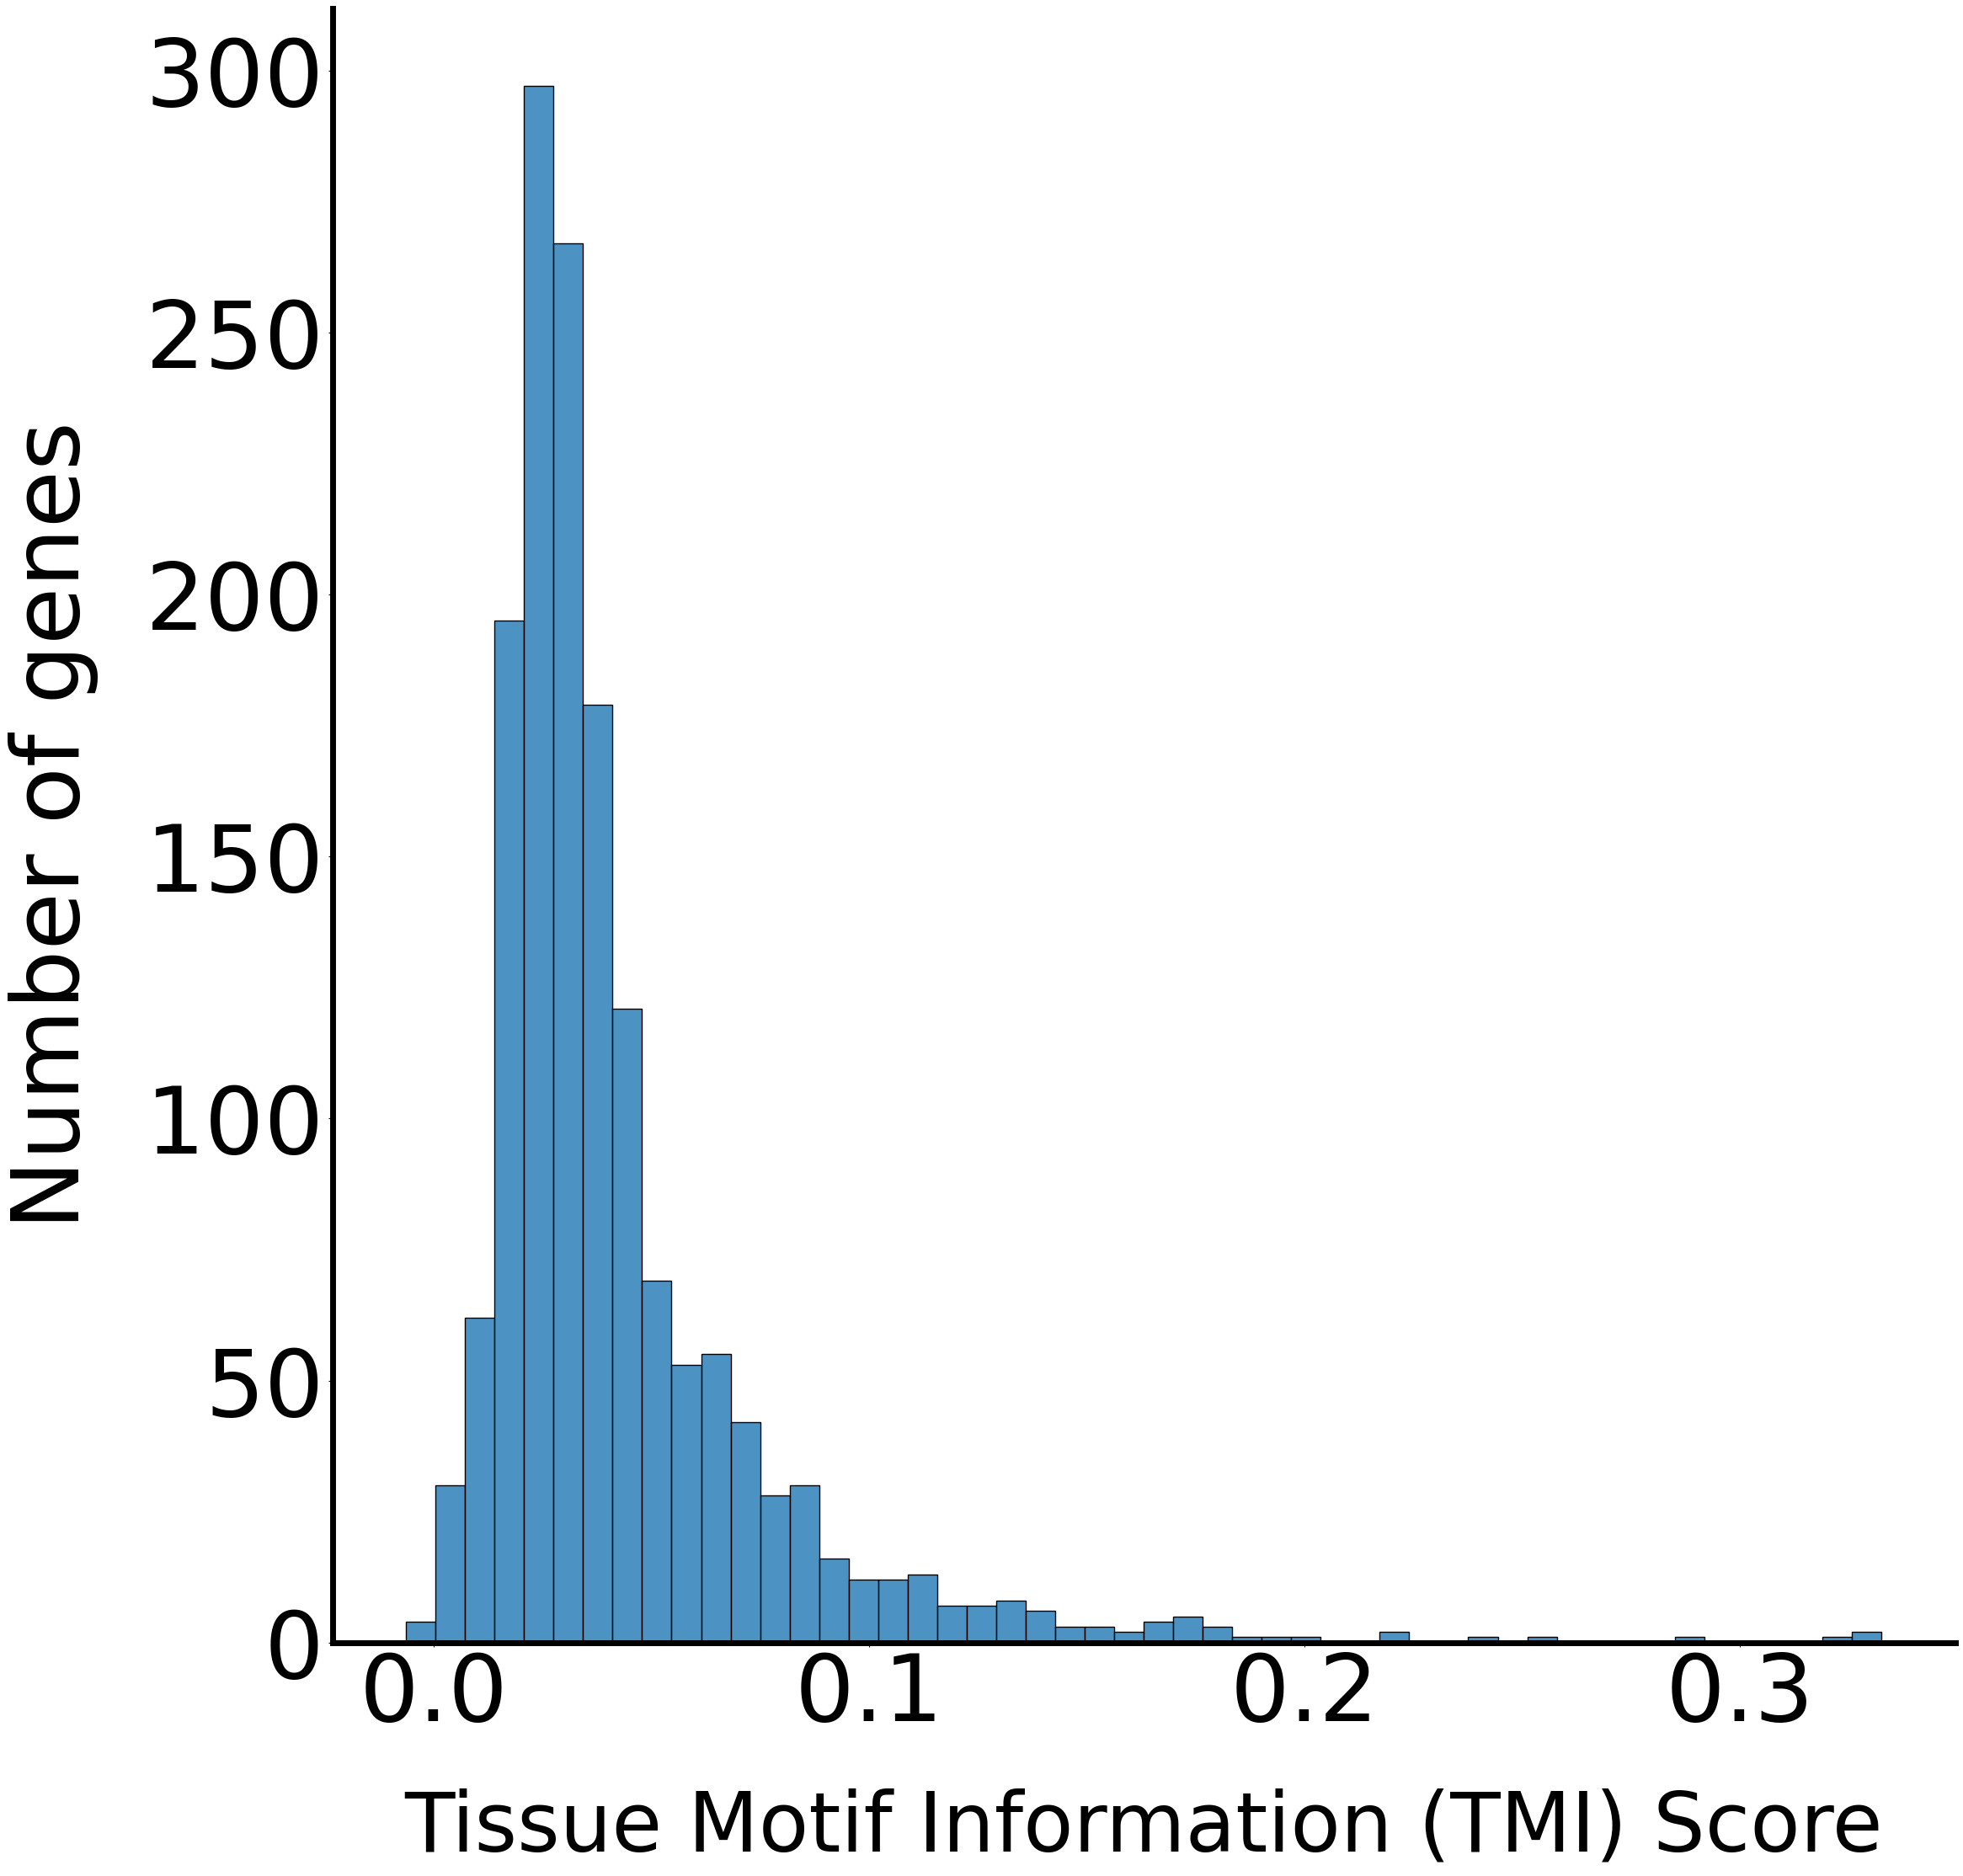

In [9]:
cell_types = ["ES"]
cell_type_names = ["Elongated Spermatids"]

results_dir = results_dirs[0]

rel_q_gk_ctypes = []

for i,ctype in enumerate(cell_types):
    
    model_rel_q_scores = []
    model_d_sq_scores = []
    
    for model,j in zip(models,range(len(models))):
        
        out_prefix = prefixes[j]
        
        
        rel_q_gk_outfile_name = out_prefix + '_' + ctype + f"_df_rel_q_gk_ssl.pickle"
        rel_q_gk_outfile = os.path.join(results_dir, rel_q_gk_outfile_name)
        rel_q_gk = pickle.load(open(rel_q_gk_outfile, 'rb'))
        
        rel_q_gk = -1 * rel_q_gk
        rel_q_gk_ctypes.append(rel_q_gk)
        
        fig, ax = plt.subplots(figsize=(20,20))
        plt.tight_layout()
        sns.histplot(rel_q_gk, bins=50, legend=False, color=colors[0], alpha=0.8)
        plt.ylabel('Number of genes', fontsize=labelfontsize, labelpad=labelpad)
        plt.xlabel('Tissue Motif Information (TMI) Score', fontsize=labelfontsize-10, labelpad=labelpad)
        ax.tick_params(axis='y', labelsize=tickfontsize)
        ax.tick_params(axis='x', labelsize=tickfontsize)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)  
        ax.spines['bottom'].set_linewidth(linewidth)
        ax.spines['left'].set_linewidth(linewidth) 
        plt.savefig('./plots/fig_1d.pdf', transparent=True, bbox_inches='tight', dpi=600)
        
        

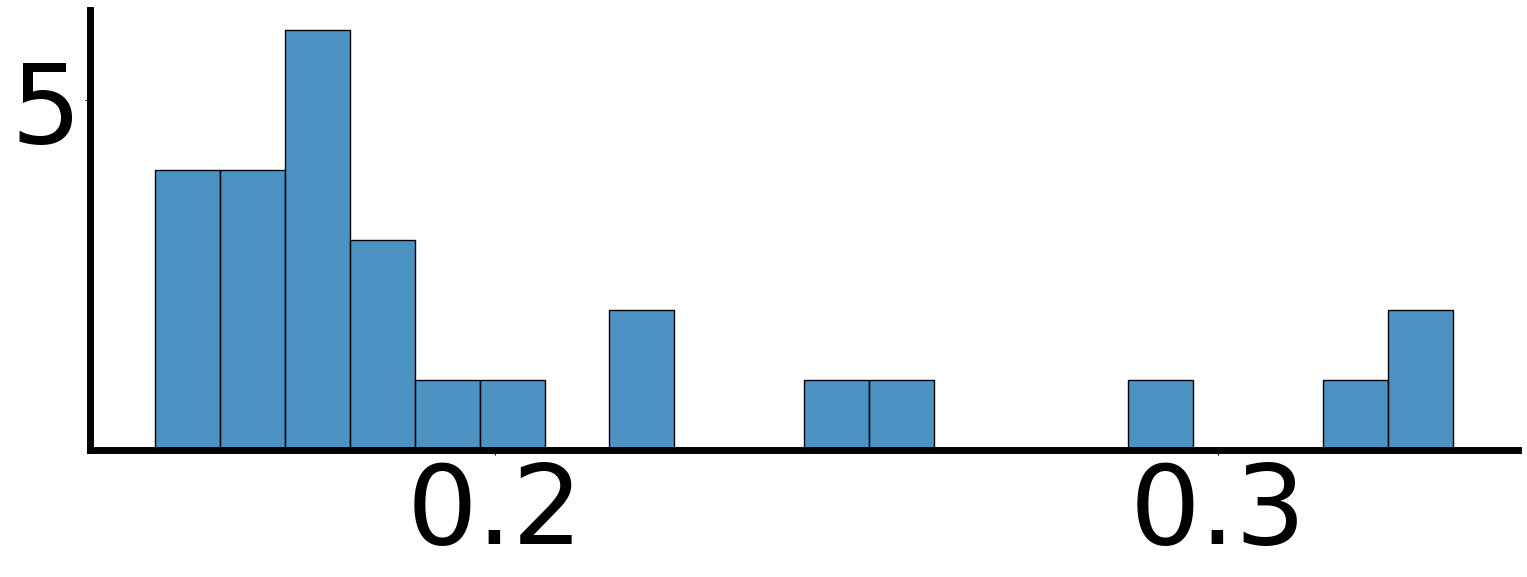

In [10]:
## zoomed in inset

cell_types = ["ES"]
cell_type_names = ["Elongated Spermatids"]

results_dir = results_dirs[0]

rel_q_gk_ctypes = []

for i,ctype in enumerate(cell_types):
    
    model_rel_q_scores = []
    model_d_sq_scores = []
    
    for model,j in zip(models,range(len(models))):
        
        out_prefix = prefixes[j]
        
        
        rel_q_gk_outfile_name = out_prefix + '_' + ctype + f"_df_rel_q_gk_ssl.pickle"
        rel_q_gk_outfile = os.path.join(results_dir, rel_q_gk_outfile_name)
        rel_q_gk = pickle.load(open(rel_q_gk_outfile, 'rb'))
        
        rel_q_gk = -1 * rel_q_gk
        rel_q_gk_ctypes.append(rel_q_gk)
        
        rel_q_gk_subset = rel_q_gk[rel_q_gk > 0.15]
        fig, ax = plt.subplots(figsize=(15,5))
        plt.tight_layout()
        sns.histplot(rel_q_gk_subset, bins=20, legend=False, color=colors[0], alpha=0.8)
        plt.ylabel('')
        plt.xticks([0.2, 0.3])#, tickfontsize=tickfontsize)
        plt.yticks([5]) #, tickfontsize=tickfontsize)
        # plt.ylabel('Frequency', fontsize=labelfontsize, labelpad=labelpad)
        # plt.xlabel('Spatial Information (SI) Score', fontsize=labelfontsize, labelpad=labelpad)
        ax.tick_params(axis='y', labelsize=tickfontsize)
        ax.tick_params(axis='x', labelsize=tickfontsize)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)  
        ax.spines['bottom'].set_linewidth(linewidth)
        ax.spines['left'].set_linewidth(linewidth) 
        plt.savefig('./plots/fig_1d_inset.pdf', transparent=True, bbox_inches='tight', dpi=600)
        
        

In [11]:
print(rel_q_gk.sort_values(by=0, ascending=False).head())
print("Median:")
print(np.median(rel_q_gk))
print("Fabp9:")
print(rel_q_gk.loc['Fabp9'])

               0
Prm2    0.332512
Tnp1    0.327313
Tnp2    0.320107
Prm1    0.288356
Fam71b  0.257879
Median:
0.031878259345377184
Fabp9:
0    0.016959
Name: Fabp9, dtype: float64


### Generate 1E

In [12]:
## Load in data

anndata_dest_folder = os.path.abspath('../TissueMosaic_output/testis/testis_anndata_model_featurized/')

# Make a list of all the h5ad files in the annotated_anndata_dest_folder
fname_list = []
for f in os.listdir(anndata_dest_folder):
    if f.endswith('.h5ad'):
        fname_list.append(f)
print(fname_list)

['wt3_dm.h5ad', 'wt1_dm.h5ad', 'diabetes2_dm.h5ad', 'wt2_dm.h5ad', 'diabetes1_dm.h5ad', 'diabetes3_dm.h5ad']


In [13]:
## preprocess data

import scanpy as sc

all_anndata_list = []

sample_id = 0
for fname in fname_list:
    adata = read_h5ad(filename=os.path.join(anndata_dest_folder, fname))
    adata.obs['sample_id'] = np.ones(adata.X.shape[0]) * sample_id
    sample_id += 1
    
    adata.obs['cell_type'] = adata.obsm['cell_type_proportions'].idxmax(axis=1)
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
        
    all_anndata_list.append(adata)

/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))
/home/skambha6/miniforge3/envs/tissuemosaic/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:351: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


/tmp/ipykernel_4011144/4216156941.py:170: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels([0.0, 2.0, 4.0])


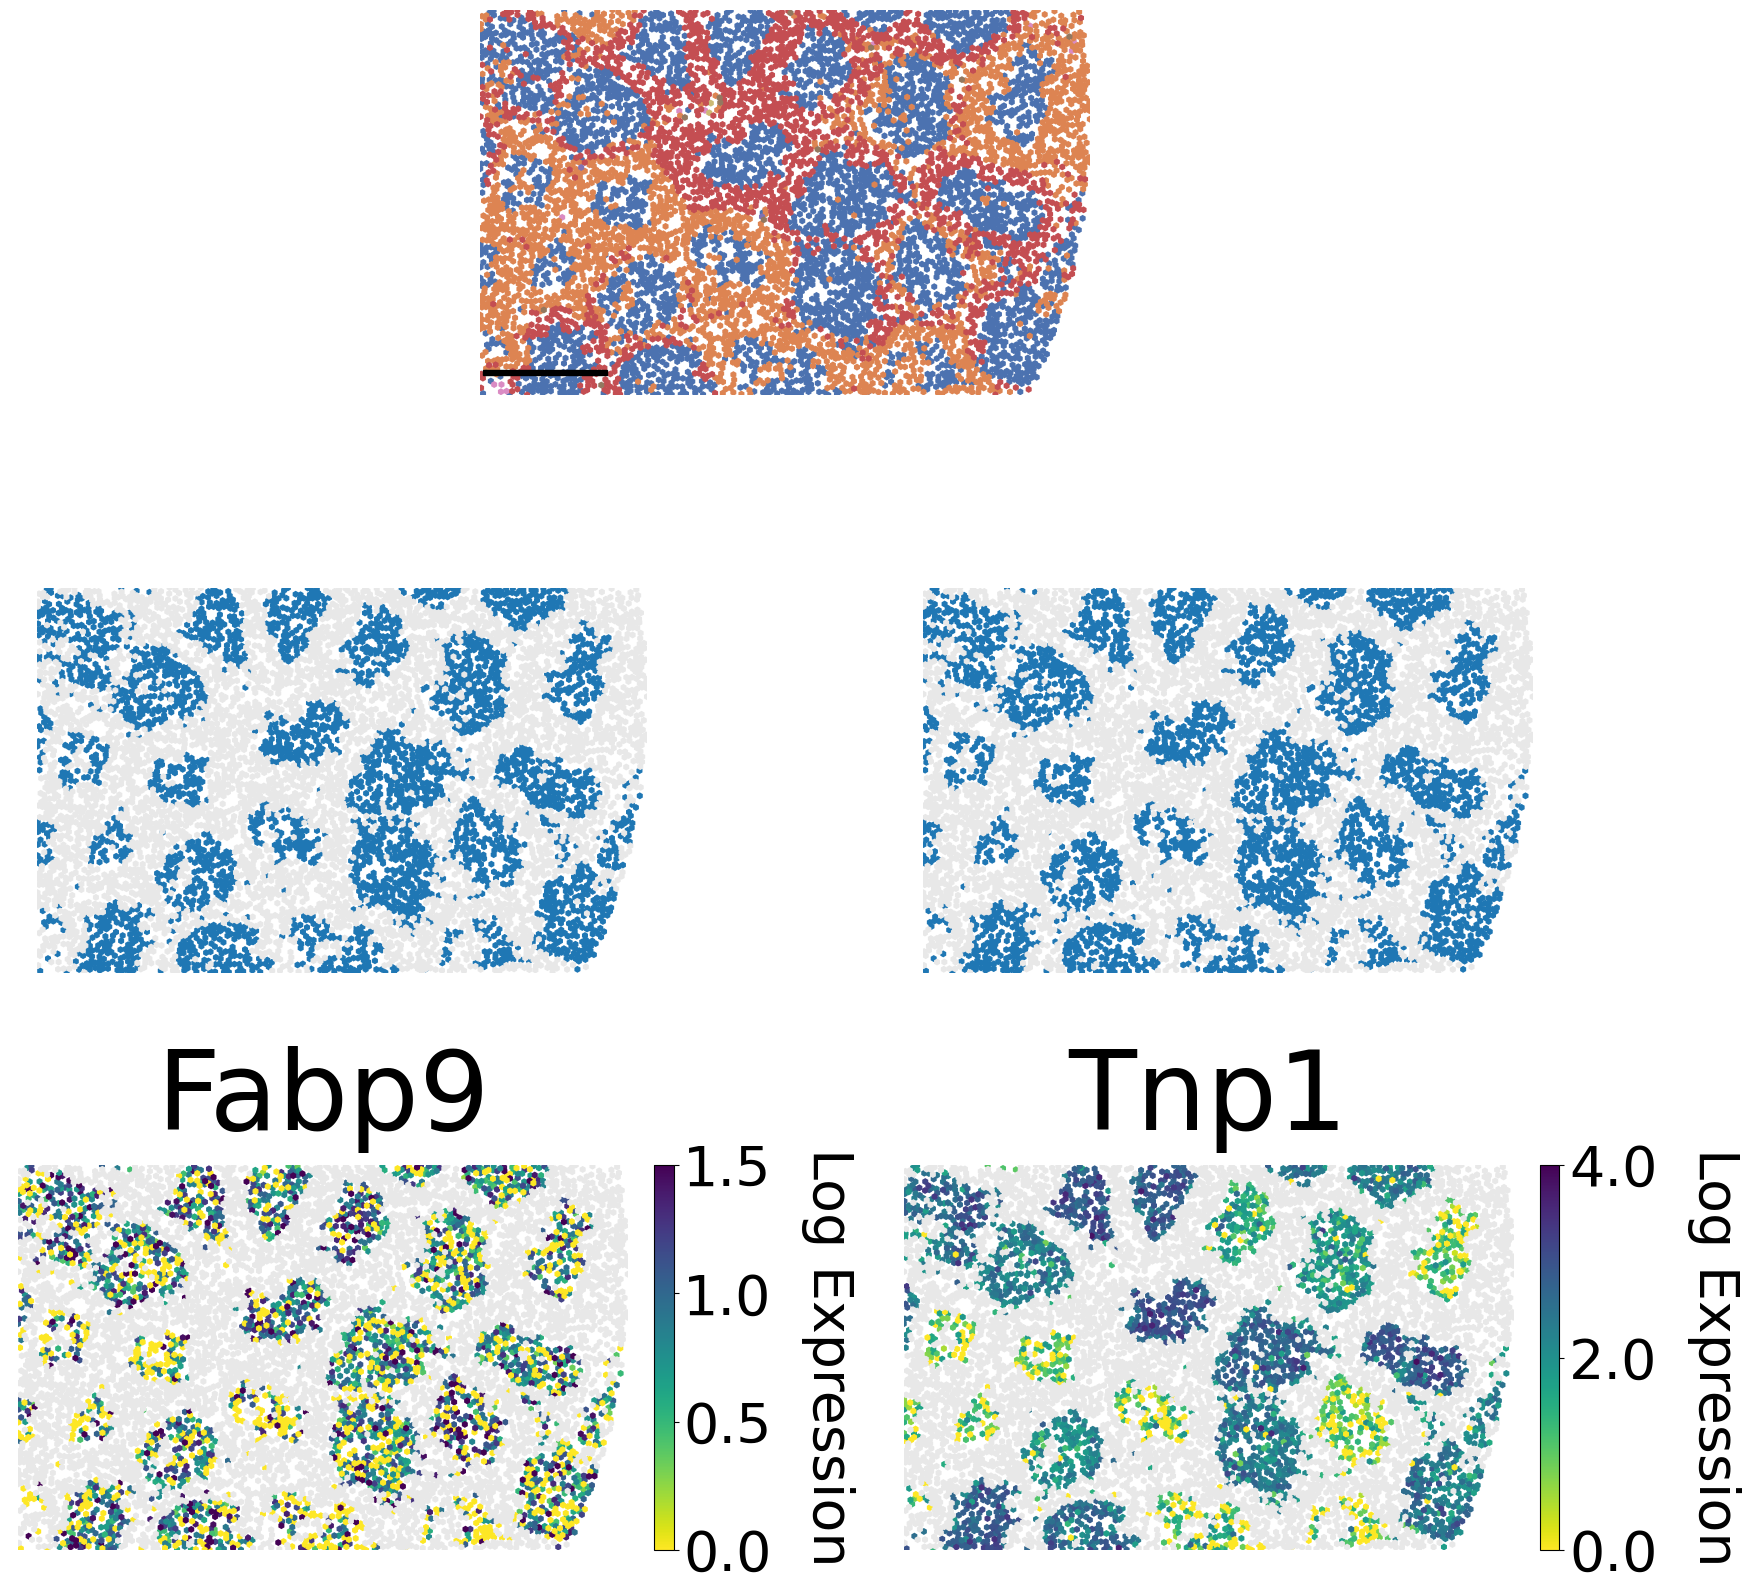

In [14]:
## plot

from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

## parameters
s = 25

i = 3 ## wt 2
adata = all_anndata_list[i]

kfold = 1

adata_kfold = adata[adata.obs[f'train_test_fold_{kfold}'] == 1]
adata_kfold_es = adata_kfold[adata_kfold.obs['cell_type'] == 'ES']
adata_kfold_nones = adata_kfold[adata_kfold.obs['cell_type'] != 'ES']

fig, axs = plt.subplots(figsize=(20,20))
axs.axis('off')

# Define the grid layout

gs = gridspec.GridSpec(3, 4, wspace=1.0, hspace=0.5) #, hspace=-0.1)


ax1 = fig.add_subplot(gs[0, 1:3])
# ax1.set_title('Testis', fontsize=labelfontsize, pad=labelpad)
scatter(adata_kfold, 'cell_type', x_key='x', y_key='y', mode='categorical', fig=fig, ax=ax1, cdict=cdict, s=s, ticks_off=True, show_legend=False,rasterized=True)
ax1.set_aspect('equal', 'box')
ax1.axis('off')
scalebar = AnchoredSizeBar(ax1.transData,
                           461.54, '', 'lower left', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=20)
ax1.add_artist(scalebar)

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# assign color to cell type
grey_hex = '#E8E8E8'
cdict_temp = {
    'ES': colors[0],
    'RS': grey_hex,
    'Myoid': grey_hex,
    'SPC': grey_hex,
    'SPG': grey_hex,
    'Sertoli': grey_hex,
    'Leydig': grey_hex,
    'Endothelial': grey_hex,
    'Macrophage': grey_hex
}

ax1 = fig.add_subplot(gs[1, :2])
# ax1.set_title('Testis', fontsize=labelfontsize, pad=labelpad)
scatter(adata_kfold, 'cell_type', x_key='x', y_key='y', mode='categorical', fig=fig, ax=ax1, cdict=cdict_temp, s=s, ticks_off=True, show_legend=False,rasterized=True)
ax1.set_aspect('equal', 'box')
ax1.axis('off')
# scalebar = AnchoredSizeBar(ax1.transData,
#                            461.54, '', 'lower left', 
#                            pad=0.1,
#                            color='black',
#                            frameon=False,
#                            size_vertical=20)
# ax1.add_artist(scalebar)

ax1 = fig.add_subplot(gs[1, 2:])
# ax1.set_title('Testis', fontsize=labelfontsize, pad=labelpad)
scatter(adata_kfold, 'cell_type', x_key='x', y_key='y', mode='categorical', fig=fig, ax=ax1, cdict=cdict_temp, s=s, ticks_off=True, show_legend=False,rasterized=True)
ax1.set_aspect('equal', 'box')
ax1.axis('off')
# scalebar = AnchoredSizeBar(ax1.transData,
#                            461.54, '', 'lower left', 
#                            pad=0.1,
#                            color='black',
#                            frameon=False,
#                            size_vertical=20)
# ax1.add_artist(scalebar)


# Second row, first plot
ax2 = fig.add_subplot(gs[2, :2])

gene = 'Fabp9'

x_coord = adata_kfold_es.obs['x']
y_coord = adata_kfold_es.obs['y']
UMI = adata_kfold_es.obs['UMI']

gene_adata = adata_kfold_es[:,gene]
genex = np.squeeze(np.array(gene_adata.X.todense().flatten()))

sc = ax2.scatter(x_coord, y_coord, c=genex, s = s, marker='h', edgecolors='none', vmin=0, vmax=1.5, cmap='viridis_r',rasterized=True)
ax2.set_aspect('equal', 'box')
ax2.set_xlim((np.min(adata_kfold.obs['x'].values), np.max(adata_kfold.obs['x'].values)))
ax2.set_ylim((np.min(adata_kfold.obs['y'].values), np.max(adata_kfold.obs['y'].values)))
ax2.axes.invert_yaxis()
ax2.set_xticks([])
ax2.set_yticks([])

scatter(adata_kfold_nones, 'cell_type', x_key='x', y_key='y', mode='categorical', fig=fig, ax=ax2, cdict=cdict_temp, s=s, ticks_off=True, show_legend=False,rasterized=True)

# axs[0].set_title(gene + ' Expression - ES cells - SI score: ' + str(round(rel_q_gk_ctypes[0].loc['Tnp1'][0], 4)))
ax2.set_title(gene, fontsize=labelfontsize, pad=labelpad-15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)  
ax2.spines['bottom'].set_visible(False)  
ax2.spines['left'].set_visible(False)
ax2.set_ylabel('Log Expression', fontsize=labelfontsize, labelpad=labelpad)  
ax2.axis('off')
cbar = plt.colorbar(sc, ax=ax2, label=None, fraction=0.030, pad=0.04)
cbar.set_label('Log Expression', rotation=270, fontsize=labelfontsize/2, labelpad=labelpad+20)
cbar.ax.tick_params(labelsize=tickfontsize/2)
# cbar.ax.set_yticklabels([0.0, 0.5, 1.0, 1.5])
# scalebar = AnchoredSizeBar(ax2.transData,
#                            461.54, '', 'lower left', 
#                            pad=0.1,
#                            color='black',
#                            frameon=False,
#                            size_vertical=20)
# ax2.add_artist(scalebar)



gene = 'Tnp1'

i = 3 ## wt 2
adata = all_anndata_list[i]

kfold = 1

adata_kfold = adata[adata.obs[f'train_test_fold_{kfold}'] == 1]
adata_kfold_es = adata_kfold[adata_kfold.obs['cell_type'] == 'ES']
adata_kfold_nones = adata_kfold[adata_kfold.obs['cell_type'] != 'ES']

x_coord = adata_kfold_es.obs['x']
y_coord = adata_kfold_es.obs['y']
UMI = adata_kfold_es.obs['UMI']

gene_adata = adata_kfold_es[:,gene]
genex = np.squeeze(np.array(gene_adata.X.todense().flatten()))

ax3 = fig.add_subplot(gs[2, 2:])


sc = ax3.scatter(x_coord, y_coord, c=genex, s = s, marker='h', edgecolors='none', vmin=0, vmax=4, cmap='viridis_r',rasterized=True)
ax3.set_aspect('equal', 'box')
ax3.set_xlim((np.min(adata_kfold.obs['x'].values), np.max(adata_kfold.obs['x'].values)))
ax3.set_ylim((np.min(adata_kfold.obs['y'].values), np.max(adata_kfold.obs['y'].values)))
ax3.axes.invert_yaxis()
ax3.set_xticks([])
ax3.set_yticks([])

scatter(adata_kfold_nones, 'cell_type', x_key='x', y_key='y', mode='categorical', fig=fig, ax=ax3, cdict=cdict_temp, s=s, ticks_off=True, show_legend=False,rasterized=True)




# axs[0].set_title(gene + ' Expression - ES cells - SI score: ' + str(round(rel_q_gk_ctypes[0].loc['Tnp1'][0], 4)))
ax3.set_title(gene, fontsize=labelfontsize, pad=labelpad-15)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)  
ax3.spines['bottom'].set_visible(False)  
ax3.spines['left'].set_visible(False)  
ax3.axis('off')
cbar = plt.colorbar(sc, ax=ax3, label=None, fraction=0.030, pad=0.04)
cbar.set_label('Log Expression', rotation=270, fontsize=labelfontsize/2, labelpad=labelpad+20)
cbar.ax.tick_params(labelsize=tickfontsize/2)
cbar.ax.set_yticklabels([0.0, 2.0, 4.0])
# scalebar = AnchoredSizeBar(ax3.transData,
#                            461.54, '', 'lower left', 
#                            pad=0.1,
#                            color='black',
#                            frameon=False,
#                            size_vertical=20)
# ax3.add_artist(scalebar)


# plt.subplots_adjust(hspace=-1, wspace=0.1)
# plt.tight_layout()
fig.savefig('./plots/fig_1e.pdf', transparent=True, bbox_inches='tight', dpi=600)

### Generate 1F

In [8]:
models = ["ncv_k10", "ncv_k25", "ncv_k50", "ncv_k100", "ncv_k500", "dino"]

reg = 0.001
prefixes = [f"ncv_k10_reg_{reg}_filter_ctype", f"ncv_k25_reg_{reg}_filter_ctype", f"ncv_k50_reg_{reg}_filter_ctype", f"ncv_k100_reg_{reg}_filter_ctype", f"ncv_k500_reg_{reg}_filter_ctype", "dino_filter_2.0_ctype"]

ncv_results_dir = os.path.abspath("../TissueMosaic_output/testis/gr_output/ncv")
dino_results_dir = os.path.abspath("../TissueMosaic_output/testis/gr_output/dino")

In [9]:
import seaborn as sns
colors = sns.color_palette("deep", 10).as_hex()

/tmp/ipykernel_4034503/750286445.py:109: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs_1.set_xticklabels(['k10', 'k25', 'k50', 'k100', 'k500', 'TissueMosaic'], rotation=45, fontsize=tickfontsize)


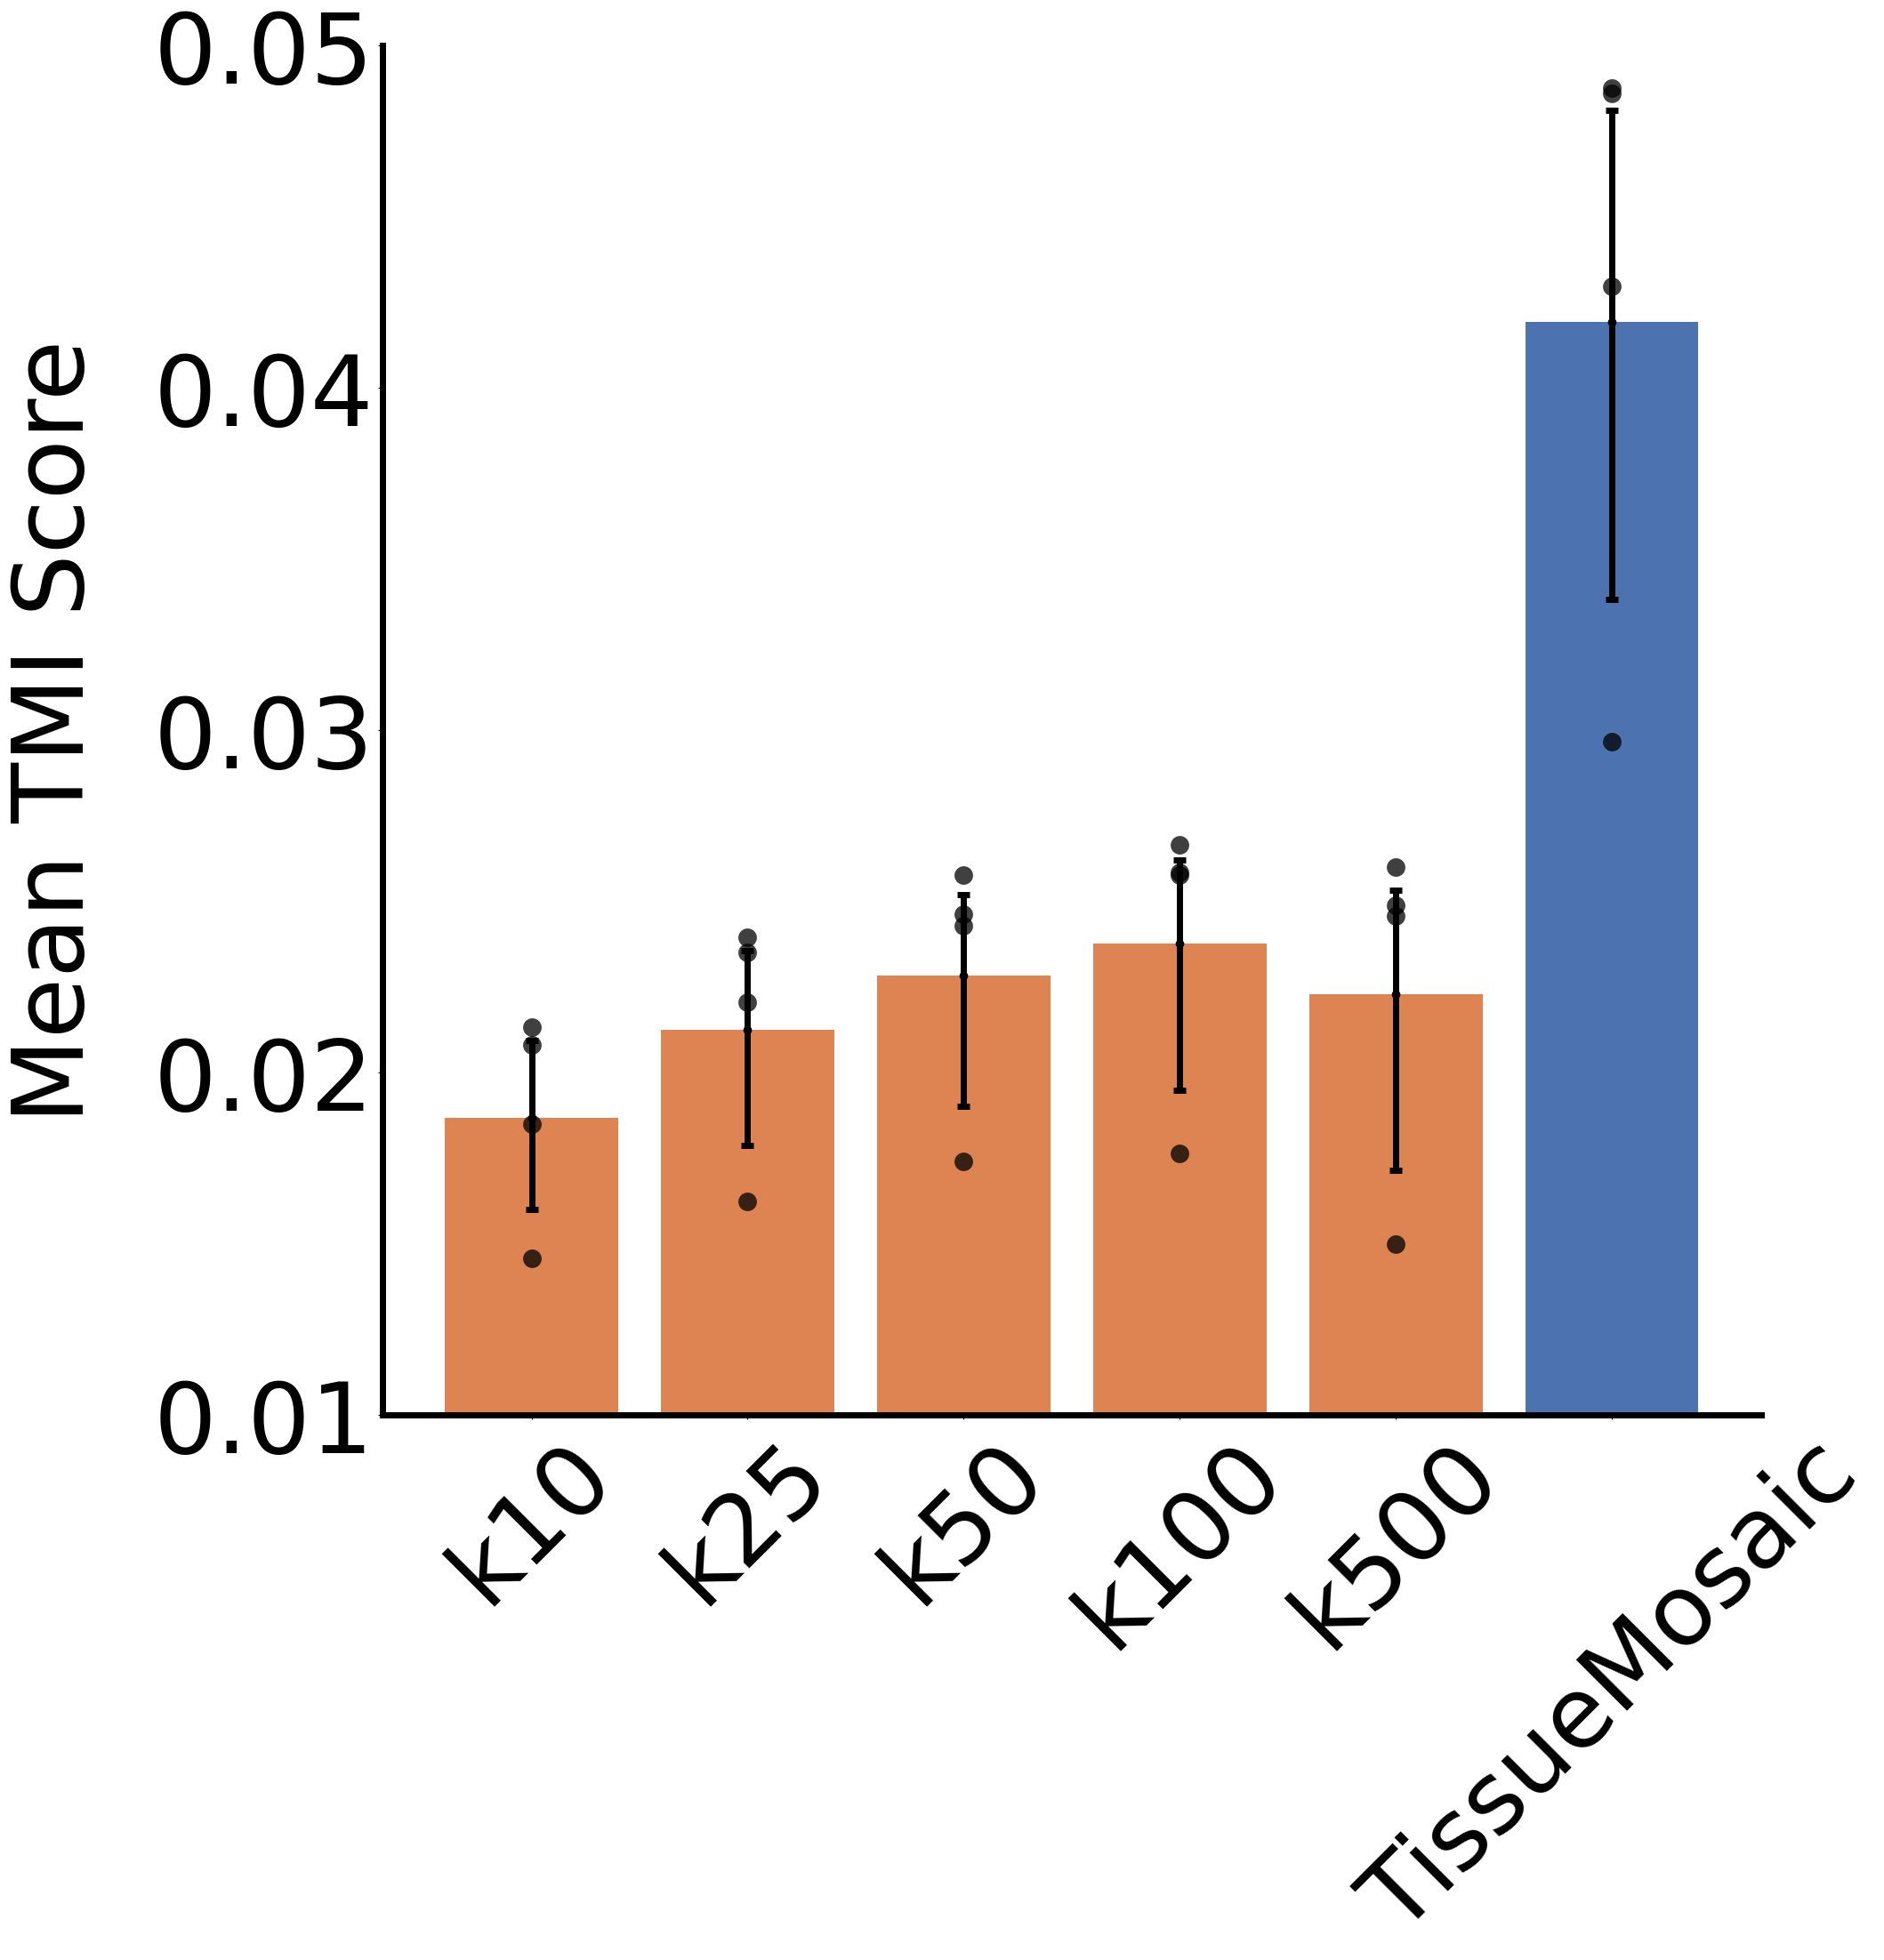

In [17]:
cell_types = ["ES"]
cell_type_names = ["Elongated Spermatids"]

fig_1, axs_1 = plt.subplots(figsize=(20,20))  # 1 row, 1 column



# fig_2, axs_2 = plt.subplots(1, len(cell_types), figsize=(15, 5))  # 1 row, 1 column

rel_q_gk_ctypes = []

rel_q_gk_kfold_ctypes = np.zeros((4,len(models)))

for i,ctype in enumerate(cell_types):
    
    model_rel_q_scores = []
    
    for model,j in zip(models,range(len(models))):
        
        if "ncv" in model:
            results_dir = ncv_results_dir
        elif "dino" in model:
            results_dir = dino_results_dir

        out_prefix = prefixes[j]

        for kfold in range(1,5):
        
            

            pred_counts_ng_outfile_name = out_prefix + '_' + ctype + f"_{kfold}" + f"_pred_counts_ng.pickle"
            pred_counts_ng_outfile = os.path.join(results_dir, pred_counts_ng_outfile_name)
            pred_counts_ng= pickle.load(open(pred_counts_ng_outfile, 'rb'))


            pred_counts_ng_baseline_outfile_name = out_prefix + '_' + ctype + f"_{kfold}" + f"_pred_counts_ng_baseline.pickle"
            pred_counts_ng_baseline_outfile = os.path.join(results_dir, pred_counts_ng_baseline_outfile_name)
            pred_counts_ng_baseline = pickle.load(open(pred_counts_ng_baseline_outfile, 'rb'))


            counts_ng_outfile_name = out_prefix + '_' + ctype + f"_{kfold}" + f"_counts_ng.pickle"
            counts_ng_outfile = os.path.join(results_dir, counts_ng_outfile_name)
            counts_ng= pickle.load(open(counts_ng_outfile, 'rb'))

            cell_type_ids_outfile_name = out_prefix + '_' + ctype + f"_{kfold}" + f"_cell_type_ids.pickle"
            cell_type_ids_outfile = os.path.join(results_dir, cell_type_ids_outfile_name)
            cell_type_ids = pickle.load(open(cell_type_ids_outfile, 'rb'))

            gene_names_outfile_name = out_prefix + '_' + ctype + f"_{kfold}" + f"_gene_names.pickle"
            gene_names_outfile = os.path.join(results_dir, gene_names_outfile_name)
            gene_names = pickle.load(open(gene_names_outfile, 'rb'))




            df_d_sq_gk, df_rel_q_gk = GeneRegression.compute_eval_metrics(pred_counts_ng, counts_ng, cell_type_ids, gene_names, pred_counts_ng_baseline)

            rel_q_gk_kfold_ctypes[kfold-1,j] = -1*np.mean(df_rel_q_gk[0])
        
        rel_q_gk_outfile_name = out_prefix + '_' + ctype + f"_df_rel_q_gk_ssl.pickle"
        rel_q_gk_outfile = os.path.join(results_dir, rel_q_gk_outfile_name)
        rel_q_gk = pickle.load(open(rel_q_gk_outfile, 'rb'))
        
        rel_q_gk_ctypes.append(rel_q_gk)

        baseline_rel_q_gk_outfile_name = out_prefix + '_' + ctype + f"_df_rel_q_gk_baseline.pickle"
        baseline_rel_q_gk_outfile = os.path.join(results_dir, baseline_rel_q_gk_outfile_name)
        baseline_rel_q_gk = pickle.load(open(baseline_rel_q_gk_outfile, 'rb'))
        
        model_rel_q_scores.append(-1*np.mean(rel_q_gk[0]))
    
    # import scipy
    # sem = scipy.stats.sem(rel_q_gk_kfold_ctypes, axis=0)    


    from scipy.stats import bootstrap

    # Compute the bootstrap confidence intervals
    means = np.mean(rel_q_gk_kfold_ctypes, axis=0)
    conf_intervals = []

    confidence_level = 0.95

    for i in range(rel_q_gk_kfold_ctypes.shape[1]):
        res = bootstrap((rel_q_gk_kfold_ctypes[:,i],), np.mean, confidence_level=confidence_level, n_resamples=10000, method='percentile')
        conf_intervals.append(res.confidence_interval)

    # Extract lower and upper bounds of the confidence intervals
    lower_bounds = [ci.low for ci in conf_intervals]
    upper_bounds = [ci.high for ci in conf_intervals]

    # Compute the error bars (distance from the mean to the bounds)
    yerr_lower = means - np.array(lower_bounds)
    yerr_upper = np.array(upper_bounds) - means
    yerr = [yerr_lower, yerr_upper]

    axs_1.bar([0,1,2,3,4,5], model_rel_q_scores, color=[colors[1], colors[1], colors[1], colors[1], colors[1], colors[0]])
    
    rel_q_gk_kfold_ctypes_pd = pd.DataFrame(rel_q_gk_kfold_ctypes)
    rel_q_gk_kfold_ctypes_pd.columns = ["ncv_k10", "ncv_k25", "ncv_k50", "ncv_k100", "ncv_k500", "dino"]
    sns.stripplot(data=rel_q_gk_kfold_ctypes_pd, ax=axs_1, jitter=0, color='black', size=15, alpha=0.75)
    
    axs_1.errorbar([0,1,2,3,4,5], model_rel_q_scores, yerr=yerr, fmt='o', color='black', ecolor='black', elinewidth=linewidth, capsize=linewidth, capthick=linewidth)
    # axs_1.set_title(cell_type_names[i], fontsize=20,pad=20)
    axs_1.set_ylabel('Mean TMI Score', fontsize=labelfontsize, labelpad=labelpad)
    axs_1.set_ylim(0.01, 0.05)
    axs_1.tick_params(axis='y', labelsize=tickfontsize)
    axs_1.set_yticks([0.01, 0.02, 0.03, 0.04, 0.05])
    axs_1.set_xticklabels(['k10', 'k25', 'k50', 'k100', 'k500', 'TissueMosaic'], rotation=45, fontsize=tickfontsize)
    axs_1.spines['bottom'].set_linewidth(linewidth)
    axs_1.spines['left'].set_linewidth(linewidth)
    axs_1.spines['top'].set_visible(False)
    axs_1.spines['right'].set_visible(False)   

fig_1.subplots_adjust(wspace=1.0)
fig_1.savefig('./plots/fig_1f.pdf', transparent=True, bbox_inches='tight', dpi=600)